# Multiprocessing using Pools 
A simple framework for assessing the impact of multiprocessing on runtime on a multi-core machine. 

In [1]:
import time
import math
import multiprocessing
from multiprocessing import Pool
import matplotlib.pyplot as plt
import os
import miscFunc as miscFunc # if miscFunc.py is changed the kernel needs to be restarted. 

# A function for timing a job that uses a pool of processes.
#  f is a function that takes a single argument
#  data is an array of arguments on which f will be mapped
#  pool_size is the number of processes in the pool. 
def pool_process(f, data, pool_size):
    tp1 = time.time()
    pool = Pool(processes=pool_size) # initialize the Pool.
    result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
    pool.close() # No more processes
    pool.join()  # Wait for the pool processing to complete. 
    #print("Results", result)
    print("Overall Time: {:.2f}".format(float(time.time()-tp1)))
    return float(time.time()-tp1)
 

In [2]:
# n = number of primes to check
n = 40
check_work = [1000003]*n
# number of cores to use
cores = os.cpu_count()

In [3]:
# store check_prime runtime for each number of cores
x = []
y = []
for i in range(cores):
    y.append(pool_process(miscFunc.check_prime, check_work, i+1))
    x.append(i+1)

Overall Time: 2.67
Overall Time: 1.81
Overall Time: 1.63
Overall Time: 1.59
Overall Time: 1.50
Overall Time: 1.68
Overall Time: 1.74
Overall Time: 1.87


In [4]:
# store fibonacci runtime for each number of cores
check_work2 = [27]*16
x2 = []
y2 = []
for i in range(cores):
    y2.append(pool_process(miscFunc.fibonacci, check_work2, i+1))
    x2.append(i+1)

Overall Time: 3.17
Overall Time: 2.41
Overall Time: 2.21
Overall Time: 1.87
Overall Time: 1.99
Overall Time: 1.87
Overall Time: 2.23
Overall Time: 2.17


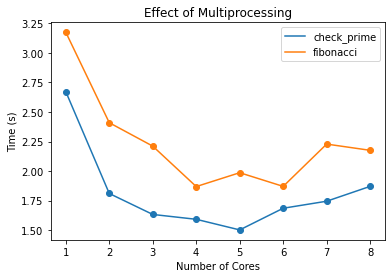

In [5]:
# plot runtime vs cores for each function
plt.plot(x,y, label="check_prime")
plt.scatter(x,y)
plt.plot(x2,y2, label="fibonacci")
plt.scatter(x2,y2)
plt.title('Effect of Multiprocessing')
plt.ylabel("Time (s)")
plt.xlabel("Number of Cores")
plt.legend()